$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Wind Speed Prediction Linear Regression Model

*Melinda Ryan and David Thorpe*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def train(X,T):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    Xs = standardize(X-means,stds)#(X - means) / stds
    #Xs = X
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs))                
    w = np.linalg.lstsq( np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T) )[0]
    return {'means': means, 'stds': stds, 'w': w}
    

In [3]:
def standardize(a,b):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.divide( a, b )
        c[ ~ np.isfinite( c )] = 0  # -inf inf NaN
    return c

In [4]:
def use(X,model):
    #Standardize data
    #Xs = X
    Xs = standardize(X-model['means'],model['stds'])#(X - model['means']) / model['stds']
    #bias 
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)), Xs)) 
    prediction = np.dot(Xs1,model['w'])
    return prediction

In [5]:
def rmse(predict,T):
    return np.sqrt(np.mean((predict - T)**2,axis=0))

In [15]:
data = np.loadtxt('output.txt')

In [16]:
data.shape

(891, 16)

In [101]:
names=['yearmoda','temp','dewp','slp','stp', 'visib','max','min','prcp','sndp','lat','lon','elev']

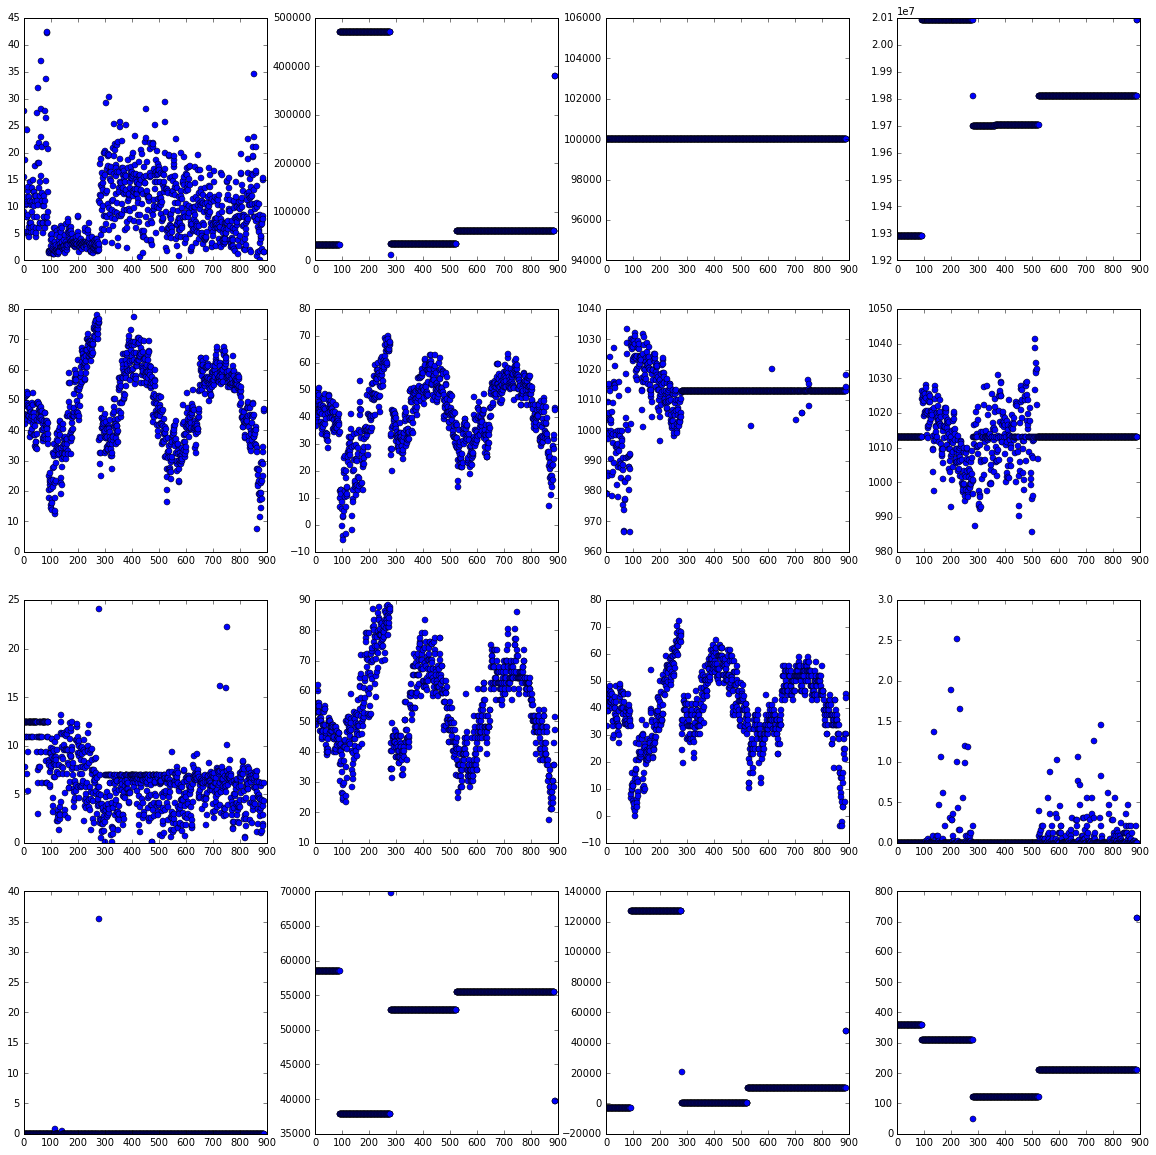

In [17]:
plt.figure(figsize=(20,20))
row,col = data.shape
for i in range(col):
    plt.subplot(4,4, i+1)
    plt.plot(data[:,i],'o')
    #plt.ylabel(names[i])

In [18]:
Xtest=data[:,3:16]
Xtest.shape

(891, 13)

In [19]:
Ttest=data[:,0:1]
Ttest.shape

(891, 1)

In [20]:
testModel = train(Xtest,Ttest)
testPrediction = use(Xtest,testModel)

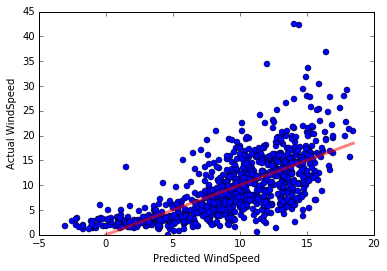

In [21]:
plt.plot(testPrediction,Ttest,'o')
plt.xlabel('Predicted WindSpeed')
plt.ylabel('Actual WindSpeed')
# add a 45 degree line
a = max(min(testPrediction),min(Ttest))
b = min(max(testPrediction),max(Ttest))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.5);

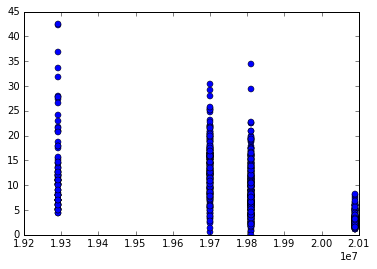

In [22]:
plt.plot(Xtest[:,0:1],Ttest,'o')

In [23]:
error = rmse(testPrediction,Ttest)
error

array([ 4.59295827])

In [30]:
newdata = np.loadtxt('stationdatanoheader.txt')

In [31]:
newdata.shape

(20441, 5)

In [37]:
lats = newdata[:,2:3]
lats = np.sort(lats,axis=0)

In [38]:
lons=newdata[:,3:4]
lons = np.sort(lons,axis=0)

In [96]:
lats[lats>41465].shape

(10221,)

In [99]:
lons[lons>41465].shape

(6759,)

In [98]:
lons.shape

(20441, 1)

In [109]:
w = testModel['w']

In [110]:
for wi,name in zip(w.flat,names):
    print('{:8.3f}  {:s}'.format(wi,name))

   9.475  yearmoda
  -1.290  temp
   5.749  dewp
  -5.060  slp
  -0.890  stp
  -0.580  visib
   0.447  max
  -5.276  min
   3.878  prcp
   0.265  sndp
  -0.093  lat
  -0.886  lon
  -1.770  elev
